# Introduction:
I am going to do data visualization and build an ML model on the Vehicle insurance dataset. This dataset contains multiple features according to the customer’s vehicle and insurance type. The main objective is to increase the clv (customer lifetime value) which means clv is the target variable. This dataset is pretty clean already, a few outliers are there. Remove the outliers. The Target column is CLV (customer Live value). Customer lifetime value is the total worth to a business of a customer over the whole period of their relationship.

**Dataset features:**<br>
CLV : It is a target column (customer Live value).<br>
Education : Customer qualification.<br>
Gender : Customer gender type.<br>
Income : Customer Income.<br>
Location : Customer Location.<br>
Martial : Customer Martial status.<br>
Monthly.Premium.Auto: car insurance premium is the amount you pay your insurance company on a regular basis.<br>
Coverage:  the amount of risk or liability that is covered for an individual or entity by way of insurance services.<br>
Total.Claim.Amount:  the sum payable at the maturity of an insurance policy.<br>
Vehicle.Size : Size of Veicle.<br>



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, auc
import scikitplot as skplt
from sklearn.metrics import roc_auc_score ,roc_curve
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('VehicleInsuranceData.csv').drop('Unnamed: 0',axis=1)
df

,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
8626,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8627,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8628,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Null Values

In [3]:
df.isnull().sum()

clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

<p>As you an see that there is no null values the dataset is clean.</p>

In [4]:
dtypes = df.dtypes
numeric = dtypes[(dtypes=='float64')|(dtypes=='int64')].index
string = dtypes[dtypes=='object'].index

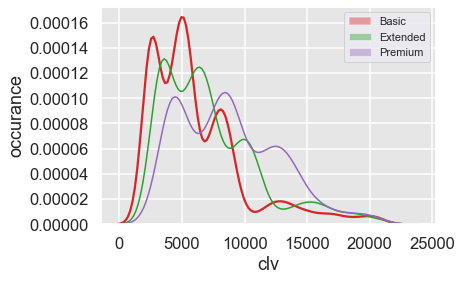

<Figure size 864x288 with 0 Axes>

In [5]:

red = sns.color_palette()[3]
white = sns.color_palette()[2]
q = sns.color_palette()[4]
ax = plt.axes()
bin_range = np.linspace(200,800,20)
plt.figure(figsize=(12,4))
for hue , plot_color in zip(['Basic', 'Extended', 'Premium'],[red,white,q]):
    age_df = df.loc[df.Coverage==hue,'clv']
    sns.distplot(age_df,bins = bin_range,
                color=plot_color,
                ax=ax,
                label=hue)
    sns.set(rc={'figure.figsize':(14,6)})
ax.legend()
ax.set(xlabel='clv',ylabel='occurance')
plt.show()

<p>In this histogram I plot the data of Coverage over clv target variable to see the distribution between Basic, Extended, and Premium category. This graphs show that Basic have varience which is represented by red color. And Extended have second highest varience and Premium have third high varience over clv.</p>

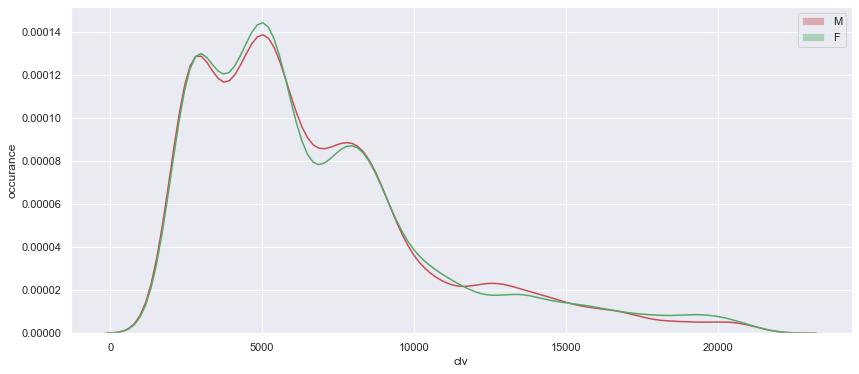

In [6]:
red = sns.color_palette()[3]
white = sns.color_palette()[2]
ax = plt.axes()
bin_range = np.linspace(20,80,20)
for hue , plot_color in zip(['M','F'],[red,white]):
    age_df = df.loc[df.Gender==hue,'clv']
    sns.distplot(age_df,bins = bin_range,
                color=plot_color,
                ax=ax,
                label=hue)
    sns.set(rc={'figure.figsize':(14,6)})
ax.legend()
ax.set(xlabel='clv',ylabel='occurance')
plt.show()

<p>In this histogram I plot the data of Gender over clv target variable to see the distribution between Male and Female category. This graphs show that both categories are equally distributed over clv.</p>

# Distributions of Numeric Columns

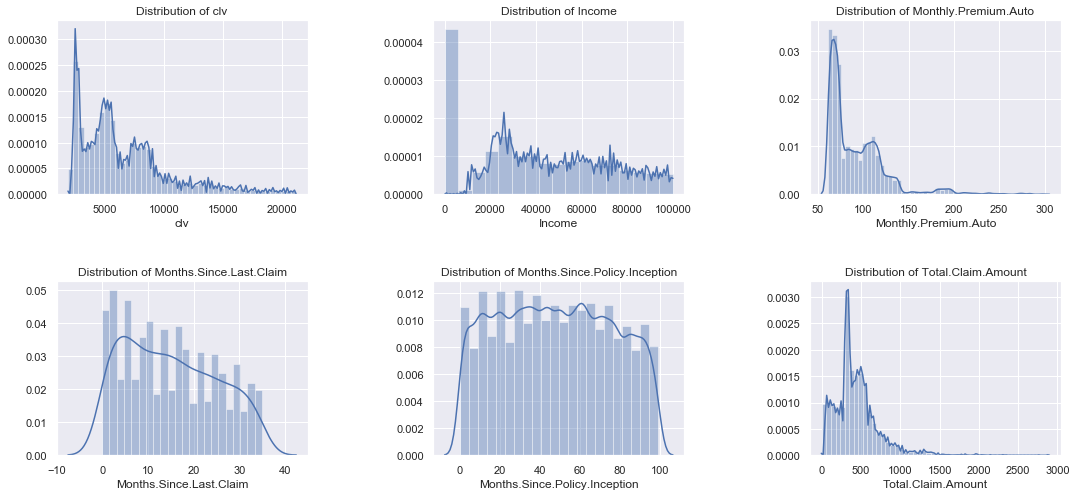

In [7]:
plt.figure(1,figsize=(18,8))
n= 0
for x in ['clv', 'Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim','Months.Since.Policy.Inception',
          'Total.Claim.Amount']:
    n+=1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],kde_kws={'bw': 2.5})
    plt.title('Distribution of {}'.format(x))
plt.show()

<h3><b>clv (customer lifetime value)</b></h3>
<p>Clv is a Target variable. The histogram of clv shows that the data has the highest peak at around 3000  and then the second highest peak at around 5000 and the third last highest peak is at around 8000 with average frequency. The Graph shows the distribution is right-skewed because the data has a tail on the right side. As the values of data increase the frequency of data decreases..</p>

<h3><b>Income</b></h3>
<p>Income is an independent variable that shows the monthly income of the customer. The histogram of Income shows that the data is approximately uniformly distributed. although the data has a higher peak at 0 income. But overall, the whole data is uniformly distributed.</p>

<h3><b>Monthly.Premium.Auto</b></h3>
<p>Monthly.Premium.Auto is a the column of auto renewal of monthly premium which is independent variable. The histogram of Monthly.Premium.Auto shows that the data has the highest peak at around 80 and then the second highest peak at around 120 with average frequency. The Graph shows the distribution of right-skewed because the data has a tail on the right side. As the values of data increase the frequency of data decreases.</p>

<h3><b>Months.Since.Last.Claim</b></h3>
<p>Months.Since.Last.Claim the column of monthly last claim by customer. The histogram of Months.Since.Last.Claim shows that the data has the highest peak at around 5 and after 5 the distribution is going down. The Graph shows the distribution is right-skewed because the data has highest peak at left side and the lowest peak at right side. As the values of data increase the frequency of data decreases.</p>

<h3><b>Months.Since.Policy.Inception</b></h3>
<p>Months.Since.Policy.Inception is an independent variable that shows the monthly last Inceptions for vehicle insurance. The histogram of Months.Since.Policy.Inception shows that the data is highly uniformly distributed at each value of Months.Since.Policy.Inception the data is approximately equaly distributed.</p>

<h3><b>Total.Claim.Amount</b></h3>
<p>Total.Claim.Amount is the data of total amount which was claimed by customers for insurance. The histogram of Total.Claim.Amount shows that the data has the highest peak at around 200 to 300. The Graph shows the distribution is right-skewed because the data has a tail on the right side. As the values of data increase the frequency of data decreases.</p>



# Log and Reciprocal Transformation

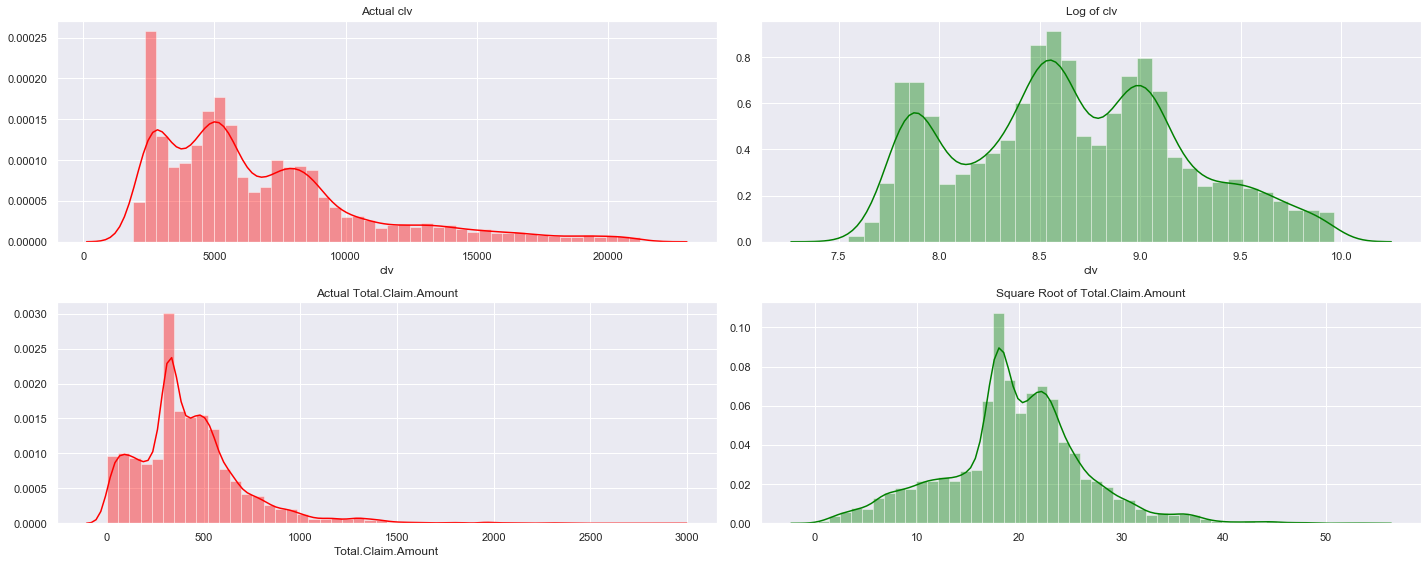

In [8]:
import math
fig , ax = plt.subplots(2,2,figsize=(20,8))
sqrt_Total_Claim_Amount = [math.sqrt(x) for x in df['Total.Claim.Amount']]
ax[0,0].title.set_text('Actual clv')
sns.distplot(df['clv'],ax=ax[0,0],color='red')

ax[0,1].title.set_text('Log of clv')
sns.distplot(np.log1p(df['clv']),ax=ax[0,1],color='green')

ax[1,0].title.set_text('Actual Total.Claim.Amount')
sns.distplot(df['Total.Claim.Amount'],ax=ax[1,0],color='red')

ax[1,1].title.set_text('Square Root of Total.Claim.Amount')
sns.distplot(sqrt_Total_Claim_Amount,ax=ax[1,1],color='green')
plt.tight_layout()    

# Skewness and Normality Test

In [9]:
from scipy.stats import normaltest
a_c_stat , a_c_p = normaltest(df['clv'])
l_c_stat , l_c_p = normaltest(np.log1p(df['clv']))
a_t_stat , a_t_p = normaltest(df['Total.Claim.Amount'])
l_t_stat , l_t_p = normaltest(sqrt_Total_Claim_Amount)
print('__________________________________________________________________')
print('The normality test and Skewness of Actual clv')
print('The Stat: {} and P value {} of Actual clv'.format(a_c_stat,a_c_p))
print('Skewness :',df['clv'].skew())
print('------------------------------------------------------------------')
print('The normality test and Skewness of Log of clv')
print('The Stat: {} and P value {} of Log of clv'.format(l_c_stat,l_c_p))
print('Skewness :',np.log1p(df['clv']).skew())
print('__________________________________________________________________')
print('The normality test and Skewness of Actual Total.Claim.Amount')

print('The Stat: {} and P value {} of Actual Total.Claim.Amount'.format(a_t_stat,a_t_p))
print('Skewness :',df['Total.Claim.Amount'].skew())
print('------------------------------------------------------------------')
print('The normality test and Skewness of Square Root of Total.Claim.Amount')
print('The Stat: {} and P value {} of Square Root of Total.Claim.Amount'.format(l_t_stat,l_t_p))
print('Skewness :',pd.Series(sqrt_Total_Claim_Amount).skew())
print('__________________________________________________________________')

__________________________________________________________________
The normality test and Skewness of Actual clv
The Stat: 1842.5059574669185 and P value 0.0 of Actual clv
Skewness : 1.3292863591978683
------------------------------------------------------------------
The normality test and Skewness of Log of clv
The Stat: 470.51482062202314 and P value 6.745355995084691e-103 of Log of clv
Skewness : 0.1620053528896739
__________________________________________________________________
The normality test and Skewness of Actual Total.Claim.Amount
The Stat: 3204.169816526084 and P value 0.0 of Actual Total.Claim.Amount
Skewness : 1.7001788215164855
------------------------------------------------------------------
The normality test and Skewness of Square Root of Total.Claim.Amount
The Stat: 165.31933857816122 and P value 1.2628790297638732e-36 of Square Root of Total.Claim.Amount
Skewness : 0.1070246478630503
__________________________________________________________________


# Hypothesis tests

<p><b>H0: (null hypothesis):</b> A variable follows a hypothesized distribution.</p>
<p><b>H1: (alternative hypothesis):</b>A variable does not follow a hypothesized distribution.</p>
<p>________________________________________________________________________________________________________________________</p>
<h3><b>Actual clv</b></h3>
<p>The p-value (0.0000e-30) is much less than 0.05, Based on that evidence we succeed to reject the null hypothesis. This means we have piece of sufficient evidence to say that the true distribution of Actual clv is Not Normal Distribution. According to the Skew value (1.3292863591978683) of Actual clv the distribution is right-skewed.</p>
<p>________________________________________________________________________________________________________________________</p>
<h3><b>Log of clv</b></h3>
<p>The p-value (3.395998819099824e-27) is also much less than 0.05, Based on that evidence we succeed to reject the null hypothesis. This means we have piece of sufficient evidence to say that the true distribution of Log of clv is also Not Normal Distribution. According to the Skew value (0.1620053528896739) of Log of clv the distribution is little right-skewed. But if we compare it to the Actual clv column we can say that the Log Distribution of clv is very near to normal distribution </p>
<p>________________________________________________________________________________________________________________________</p>
<h3><b>Actual Total.Claim.Amount</b></h3>
<p>The p-value (0.0000e-40) is much less than 0.05, Based on that evidence we succeed to reject the null hypothesis. This means we have piece of sufficient evidence to say that the true distribution of the Actual Total.Claim.Amount is Not Normal Distribution. According to the Skew value (1.7001788215164855) of Actual Total.Claim.Amount the distribution is right-skewed.</p>
<p>________________________________________________________________________________________________________________________</p>
<h3><b>Squrae root of Total.Claim.Amount</b></h3>
<p>The p-value (4.2111177636569615e-31) is also much less than 0.05, Based on that evidence we succeed to reject the null hypothesis. This meanswe have piece of sufficient evidence to say that the true distribution of Squrae root of the Total.Claim.Amount is also Not Normal Distribution. According to the Skew value (0.1070246478630503) of Squrae root of Total.Claim.Amount the distribution is less right-skewed. But if we compared it with the Actual Total.Claim.Amount, we can easily observed that the Log Distribution of Total.Claim.Amount is very near to the Normal Distribution. </p>

# Categorical variables Distribution Aanalysis

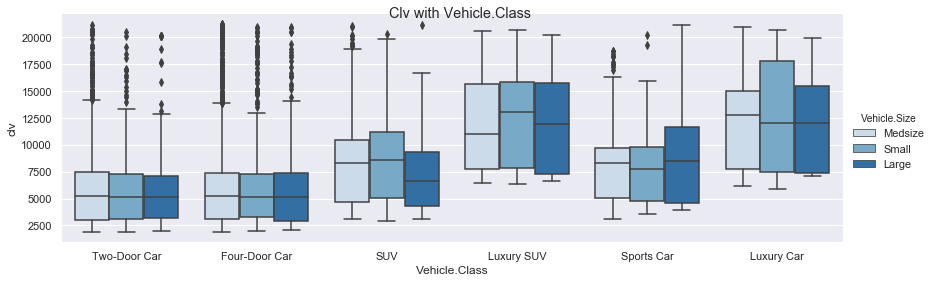

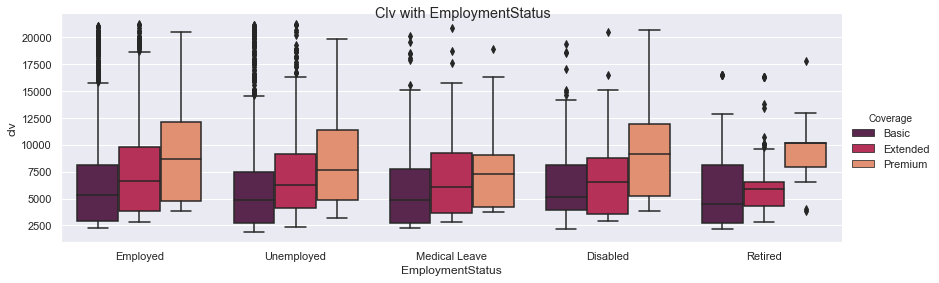

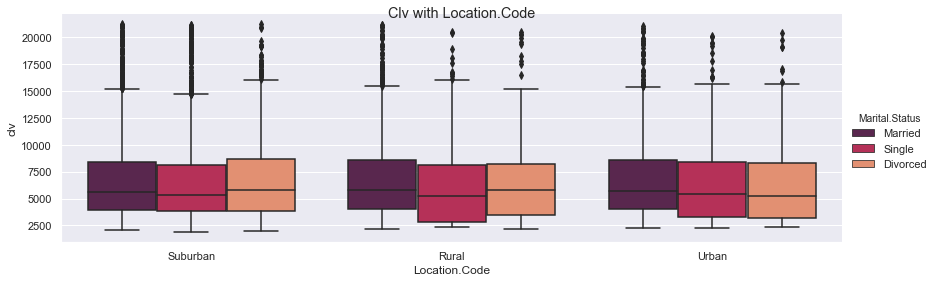

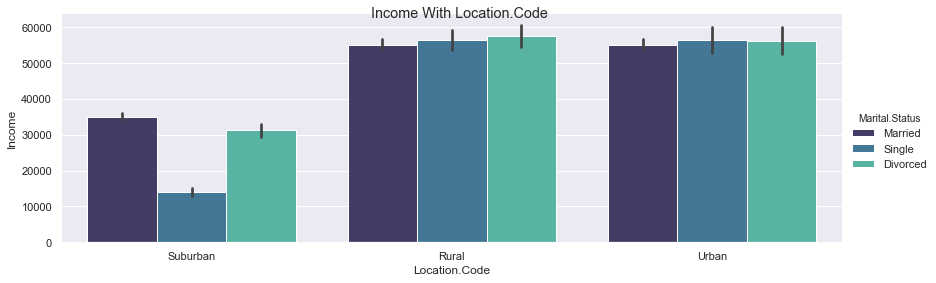

In [10]:
ax1 = sns.catplot(x='Vehicle.Class',y='clv',hue='Vehicle.Size',data = df, kind='box',height=4,aspect=3,palette="Blues")
ax1.fig.suptitle('Clv with Vehicle.Class')
plt.show()
ax2=sns.catplot(x='EmploymentStatus',y='clv',hue='Coverage',data = df, kind='box',height=4,aspect=3,palette="rocket")
ax2.fig.suptitle('Clv with EmploymentStatus')
plt.show()
ax3 = sns.catplot(x='Location.Code',y='clv',hue='Marital.Status',data = df, kind='box',height=4,aspect=3,palette="rocket")
ax3.fig.suptitle('Clv with Location.Code')
plt.show()

ax4 = sns.catplot(x='Location.Code',y='Income',hue='Marital.Status',data = df, kind='bar',height=4,aspect=3,palette="mako")
ax4.fig.suptitle('Income With Location.Code ')
plt.show()

<h3><b>Clv with Vehicle.Class</b></h3>
<p>Those customers who have a Luxury car have an average (12500) customer lifetime value (clv) and have a maximum value of 20000 clv. And those customers who have a Two-Door and Four-Door car have an average of 5000 customer lifetime value (clv) which is lower than those customers who have Luxury cars and luxury SUV. And the customers who have a sports car have an average of 7500 clv.</p>

<h3><b>Clv with EmploymentStatus</b></h3>
<p>The customers with Premium Coverage have a high customer lifetime value (clv) which is more than 7500 clv and the customers with Extended Coverage have an average value of less than 7000 clv and the customers with Basic Coverage have an average value less than 5000. The distribution of EmploymentStatus is uniform which means every category is equally distributed and has not to impact on customer lifetime value (clv).</p>

<h3><b>Clv with Location.Code</b></h3>
<p>The Location.Code and Marital.Status also have an uniform distribution. The average clv of Location.Code and Marital.Status is 5000 and have an maximum 15000 clv and minimum 2500 clv in each category..</p>

<h3><b>Income With Location.Code</b></h3>
<p>Those customers who are from Rural and Urban area have an high income which is greator than and equal to 50000 and those who are form subrban area have an maximum income of 30000.</p>

# Data Preprocessing

<h3><b>Replacing the Specific Unique Values</b></h3>

In [11]:
df_label = df.copy()

In [12]:
df_label['Vehicle.Class'] = df_label['Vehicle.Class'].replace({'Luxury SUV':'LuxurySUV'})
df_label['Vehicle.Size'] = df_label['Vehicle.Size'].replace({'Medsize':'Medium'})

In [13]:
df_label['Policy.Type'] = df_label['Policy.Type'].str.split(' ',expand=True)[0]
df_label['Policy'] = df_label['Policy'].str.split(' ',expand=True)[1]
df_label['Renew.Offer.Type'] = df_label['Renew.Offer.Type'].str.split('',expand=True)[6]
df_label['Vehicle.Class'] = df_label['Vehicle.Class'].str.split(' ',expand=True)[0]

<h3><b>Creating a List of Categorical and Binary columns</b></h3>

In [14]:
uniques = df[string].nunique()
categorical = uniques[uniques>2].index
binary = uniques[uniques<=2].index

# Encoding of Binary and Categorical Columns

<p>Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.</p>

In [15]:
from sklearn.preprocessing import LabelEncoder , LabelBinarizer
df1 = df_label.copy()
le =  LabelEncoder()
lb = LabelBinarizer()

for x in binary:
    df1[x] = lb.fit_transform(df1[x])
    
for x in categorical:
    df1[x] = le.fit_transform(df1[x])

# Correlation between Columns

In [16]:
mask = np.zeros_like(df1.corr())
triangle = np.triu_indices_from(mask)
mask[triangle]=True

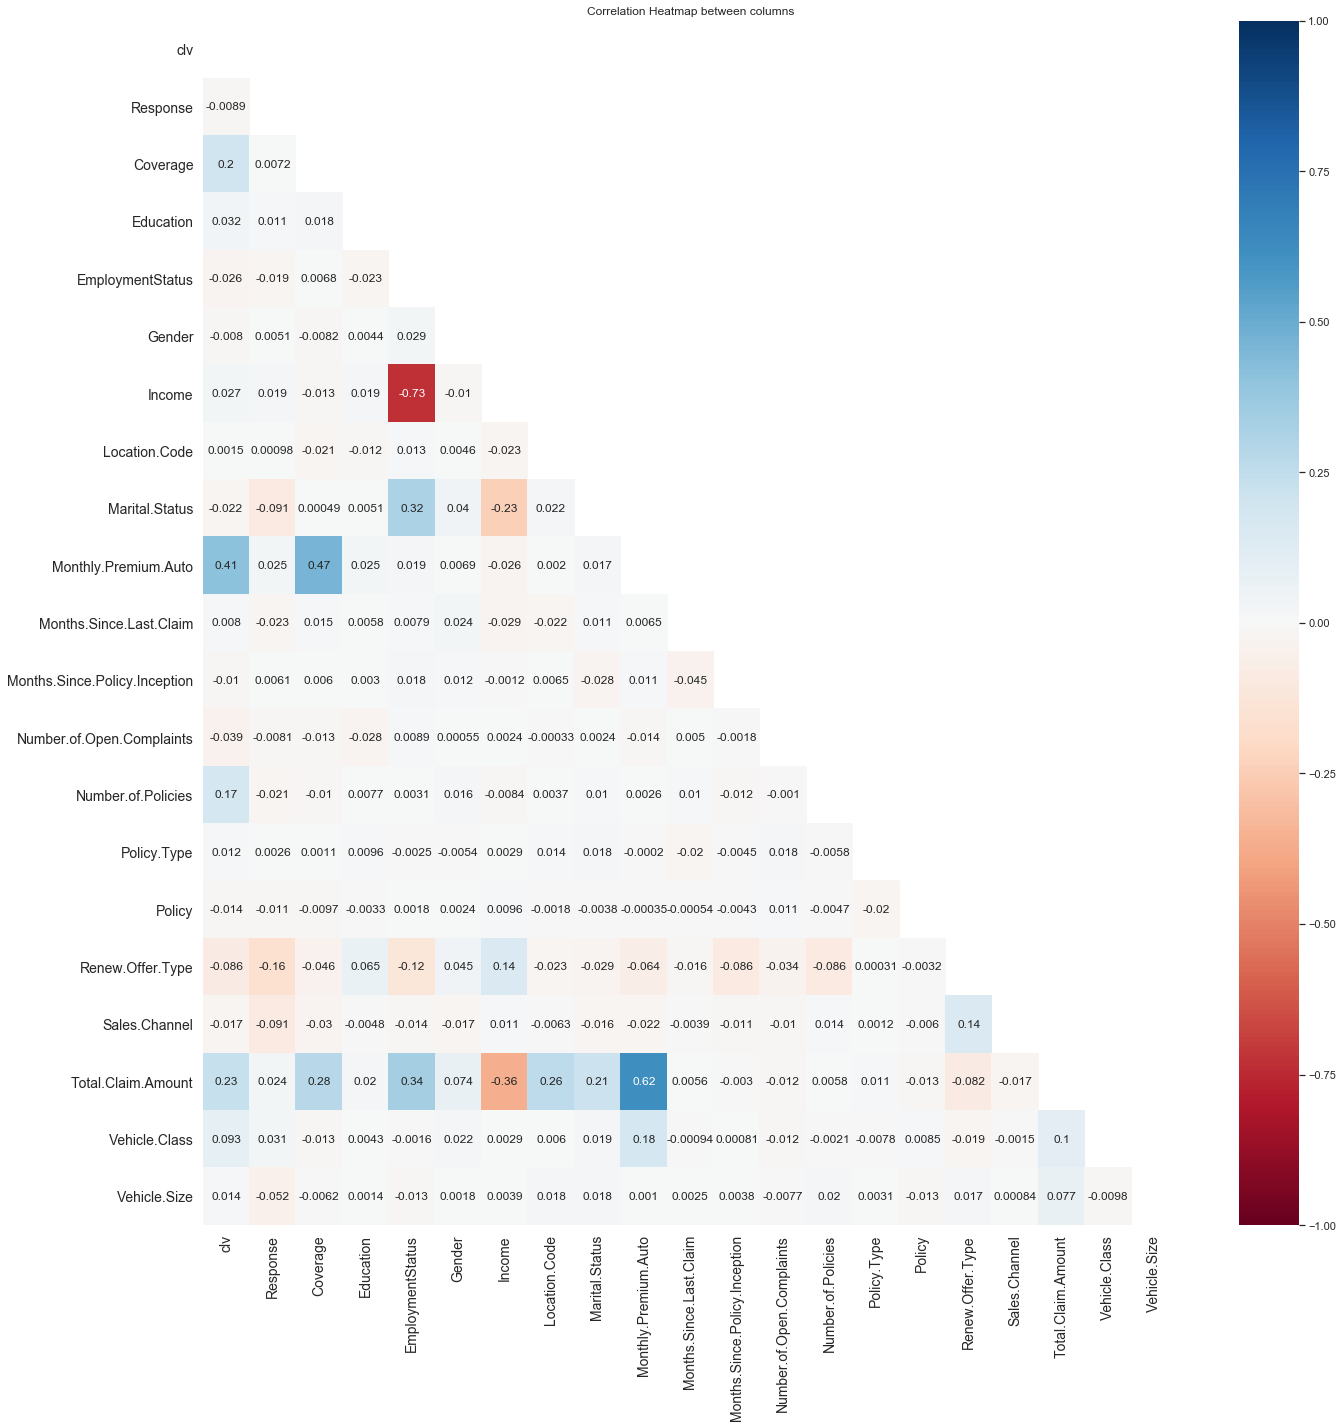

In [17]:
sns.set_style('white')
plt.figure(figsize=(20,20))
s = sns.heatmap(df1.corr(),
                mask=mask,
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=14)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=14)
plt.title("Correlation Heatmap between columns")
plt.tight_layout() 
plt.savefig('Correlation Heatmap.png')
plt.show()

<p>It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.</p>

<p>&#8226; Positive Correlation: both variables change in the same direction.</p>
<p>&#8226; Neutral Correlation: No relationship in the change of the variables.</p>
<p>&#8226; Negative Correlation: variables change in opposite directions.</p>

<h3><b>Positively Correlated variables</b></h3>
<p><b>Coverage and Monthly.Premium.Auto </b> are highly positively correlated and their correlation value is 0.47 which is near to one. It means they depend on each other if the value of Coverage is the increased value of Monthly.Premium.Auto will also increase by 0.47 because their relationship is directly proportional to each other.</p>
<p><b>Clv and Monthly.Premium.Auto </b> are positively correlated and their correlation value is 0.41 which is less near to one but their correlation is positive. It means they depend on each other if the value of Clv increases value Monthly.Premium.Auto will also increase by 0.41 because their relationship is directly proportional to each other.</p>
<p><b>Total.Claim.Amount and Monthly.Premium.Auto </b> are highly positively correlated and their correlation value is 0.62 which is near to one. It means they depend on each other if the value of Total.Claim.Amount has increased the value of Monthly.Premium.Auto will also increase by 0.62 because their relationship is directly proportional to each other.</p>

<h3><b>Negatively Correlated variables</b></h3>
<p><b>EmploymentStatus and Income </b> are highly negatively correlated and their correlation value is -0.73 which is near to -1. It mean they are depend on each other if the value of EmploymentStatus is decreases the value of Income will increase by 0.73 and if the EmploymentStatus decreases the value of Income will decrease by 0.73 because their relation is inversly proportional to each other.</p>

<h3><b>Neutrally Correlated variables</b></h3>
<p><b>Location.Code and Income</b> are neutrally correlated and their value is -0.023 which is very near to 0 form the left side. It mean they are not depend on each other if we change the value of one column then it will have an impact on other column.</p>

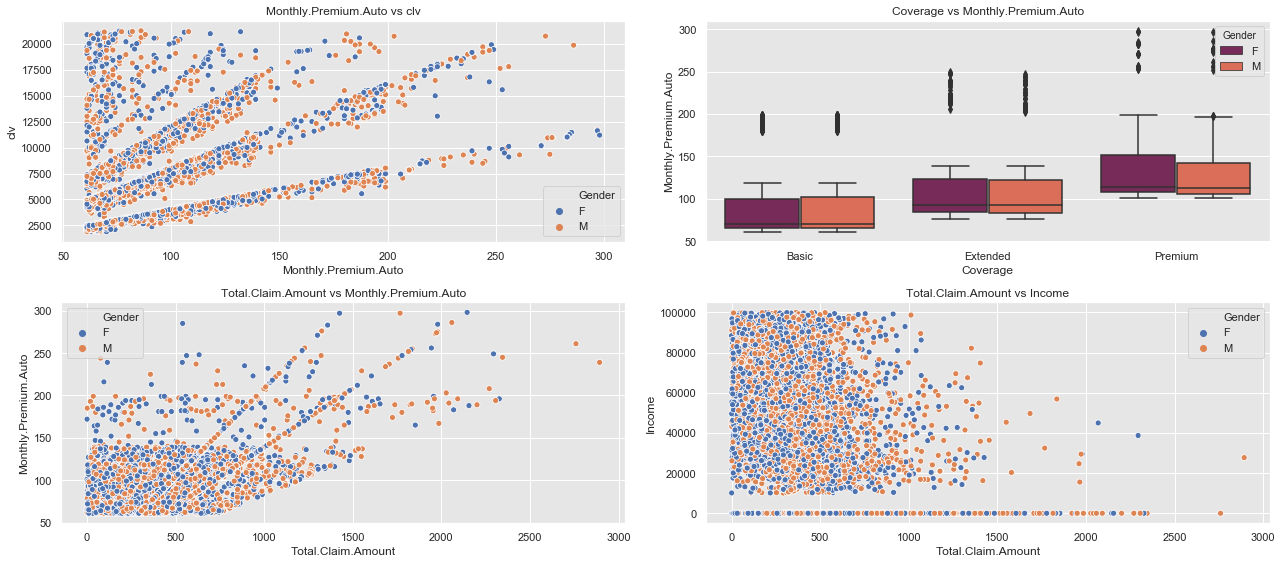

In [18]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax =plt.subplots(2,2,figsize=(18,8))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax = ax.flatten()
ax[0].title.set_text('Monthly.Premium.Auto vs clv')
sns.scatterplot(x=df['Monthly.Premium.Auto'],y=df['clv'],hue=df["Gender"],ax=ax[0])

ax[1].title.set_text('Coverage vs Monthly.Premium.Auto')
sns.boxplot(x=df['Coverage'],y=df['Monthly.Premium.Auto'],hue=df["Gender"],palette='rocket',ax=ax[1])

ax[2].title.set_text('Total.Claim.Amount vs Monthly.Premium.Auto')
sns.scatterplot(x=df['Total.Claim.Amount'],y=df['Monthly.Premium.Auto'],hue=df["Gender"],ax=ax[2])

ax[3].title.set_text('Total.Claim.Amount vs Income')
sns.scatterplot(x=df['Total.Claim.Amount'],y=df['Income'],hue=df["Gender"],ax=ax[3])
plt.tight_layout() 

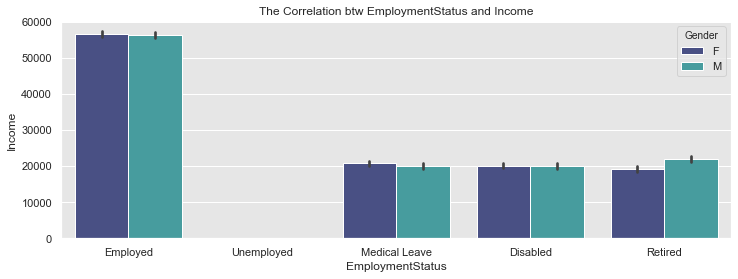

In [19]:
plt.figure(figsize=(12,4))
plt.title('The Correlation btw EmploymentStatus and Income')
sns.barplot(x=df['EmploymentStatus'],y=df['Income'],hue=df["Gender"],palette='mako')

<p><b>EmploymentStatus and Income </b> are highly negatively correlated and their correlation value is -0.73 which is near -1. It means they are dependent on each other if the value of EmploymentStatus has decreased the value of Income will increase by 0.73 and if the EmploymentStatus decreases the value of Income will decrease by 0.73 because their relation is inversely proportional to each other. Those customers who are employed have high income than Medical Leave, Disabled, and Retired. And those customers who are unemployed have approximately equal to 0.</p>

# Correlations of Independant Features  with Target Column

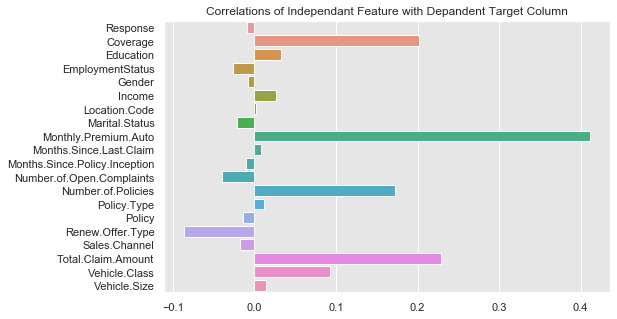

In [20]:
plt.figure(figsize=(8,5))
axes = plt.gca()
axes.yaxis.grid(True)
axes.xaxis.grid(True)
plt.title('Correlations of Independant Feature with Depandent Target Column')
sns.barplot(x=df1.drop('clv',axis=1).corrwith(df1['clv']).values, 
         y=df1.drop('clv',axis=1).corrwith(df1['clv']).index)

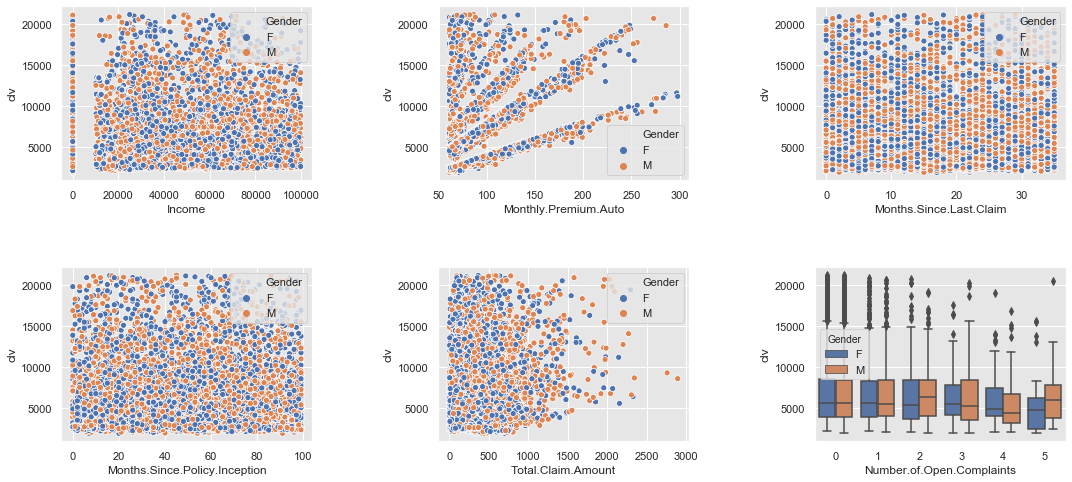

In [21]:
scatter_columns = ['clv', 'Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim','Months.Since.Policy.Inception',
          'Total.Claim.Amount']
fig, ax =plt.subplots(2,3,figsize=(18,8))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax = ax.flatten()
sns.scatterplot(x=df['Income'],y=df['clv'],hue=df["Gender"],ax=ax[0])
sns.scatterplot(x=df['Monthly.Premium.Auto'],y=df['clv'],hue=df["Gender"],ax=ax[1])
sns.scatterplot(x=df['Months.Since.Last.Claim'],y=df['clv'],hue=df["Gender"],ax=ax[2])
sns.scatterplot(x=df['Months.Since.Policy.Inception'],y=df['clv'],hue=df["Gender"],ax=ax[3])
sns.scatterplot(x=df['Total.Claim.Amount'],y=df['clv'],hue=df["Gender"],ax=ax[4])
sns.boxplot(x=df['Number.of.Open.Complaints'],y=df['clv'],hue=df["Gender"],ax=ax[5])
plt.savefig("Corrlation Sctter plot with target column.png")


# Feature Selection
<p>By analyzing the Bar and Scatter plots we can easily see the correlation of independent columns with Target variable clv. </p>
<p>Let's first talk about <b>Income</b> correlation with clv. The bar plot shows that the correlation between Income and clv is (0.027) which is too low. so that we can say that the correlation is neutral because the scatter plot of Income and clve shows the uniform behavior. For model training Neutral variables are not good so that we can eliminate income for training. </p>
<p>Now let's talk about <b>Monthly.Premium.Auto</b>. The correlation between Monthly.Premium.Auto and clv are highly positive which is (0.41). So, Monthly.Premium.Auto is an important feature for Model training. As you can see that the scatter plot of Monthly.Premium.Auto and clv show many linear lines which are good high Monthly.Premium.Auto values have high clv values.</p>
<p>The correlation of <b>Months.Since.Last.Claim </b> and <b>Months.Since.Policy.Inception </b> with clv are (0.008) and (-0.01) which are neutral. so, these columns are not correlated with Target variable clv so we can eliminate them for better Prediction.</p>
<p>The correlation of <b>Total.Claim.Amount</b> with clv is (0.23) which is also positive. so this feature is important for feature selection.</p>

Text(0.5, 0.98, 'The Correlation of Number.of.Open.Complaints with Clv')

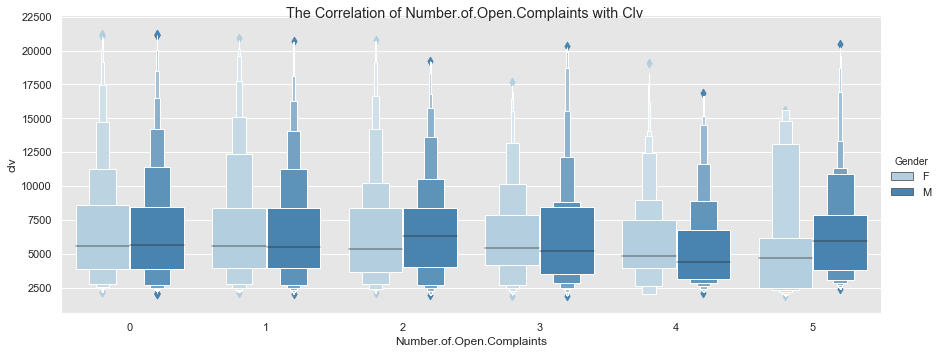

In [22]:
ax =sns.catplot(x='Number.of.Open.Complaints',y='clv',data=df,
            hue="Gender",kind='boxen',height=5,aspect=2.5,
            palette="Blues")
ax.fig.suptitle('The Correlation of Number.of.Open.Complaints with Clv')

<p>The correlation of Number.of.Open.Complaints with clv is (-0.039) which is near to neutral. so, this columns is not correlated with Target variable clv so we can eliminate it for better Prediction. The Boxen plot shows that the average is approximately same in all category of Number.of.Open.Complaints which is 5000 clv.</p>

<h1>Removing the outliers by using Standard Deviation Method</h1>

<p>One of the most commonly used tools in determining outliers is the Z-score. Z-score is just the number of standard deviations away from the mean that a certain data point is.</p>

In [23]:
df1['log_clv'] = [np.log1p(x) for x in df1['clv']]
df1['sqrt_TotalClaimAmount'] = [math.sqrt(x) for x in df1['Total.Claim.Amount']]

In [24]:
upper_limit = df1['log_clv'].mean() +2*df1['log_clv'].std()
lower_limit = df1['log_clv'].mean() - 2*df1['log_clv'].std()
df2 = df1[(df1['log_clv']<upper_limit)&(df1['log_clv']>lower_limit)]

<p>In Above code i create upper limit and lower limit of Standard Deviation and add to the mean of log_clv column. In Upper Limit I add the 2 STD in the mean of log_clv and get the upper limit of(9.7629) log_clv and in Lower Limit I subtract the 2 STD from the mean of log_clv and get the Lower limit of(7.556) log_clv.</p>

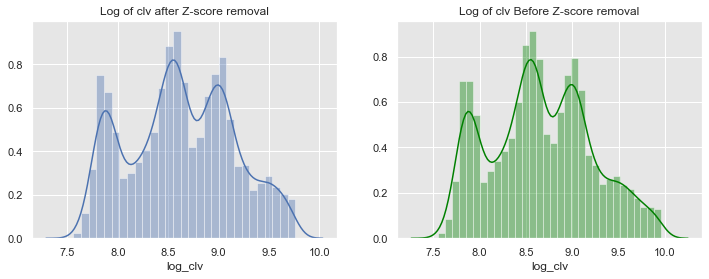

In [25]:
fig, ax =plt.subplots(1,2,figsize=(12,4))
ax[0].title.set_text('Log of clv after Z-score removal')
sns.distplot(df2['log_clv'],ax=ax[0])
ax[1].title.set_text('Log of clv Before Z-score removal')
sns.distplot(df1['log_clv'],color='green',ax=ax[1])

In [26]:
upper_limit = df1['sqrt_TotalClaimAmount'].mean() +1.55*df1['sqrt_TotalClaimAmount'].std()
lower_limit = df1['sqrt_TotalClaimAmount'].mean() - 2.2*df1['sqrt_TotalClaimAmount'].std()
df3 = df2[(df2['sqrt_TotalClaimAmount']<=upper_limit)&(df2['sqrt_TotalClaimAmount']>lower_limit)]

<p>In Above code i create upper limit and lower limit of Standard Deviation and add to the mean of sqrt_TotalClaimAmount column. In Upper Limit I add the (1.55) STD in the mean of sqrt_TotalClaimAmount and get the upper limit of(30) log_clv and in Lower Limit I subtract the (2.2) STD from the mean of sqrt_TotalClaimAmount and get the Lower limit of(4.488) sqrt_TotalClaimAmount.</p>

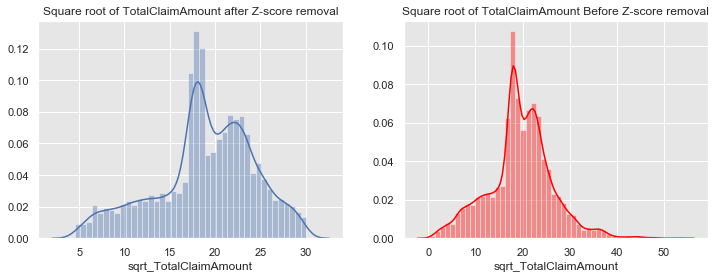

In [27]:
fig, ax =plt.subplots(1,2,figsize=(12,4))
ax[0].title.set_text('Square root of TotalClaimAmount after Z-score removal')
sns.distplot(df3['sqrt_TotalClaimAmount'],ax=ax[0])
ax[1].title.set_text('Square root of TotalClaimAmount Before Z-score removal')
sns.distplot(df1['sqrt_TotalClaimAmount'],color='red',ax=ax[1])

# Training the data

In [28]:
drop_columns = ['Months.Since.Last.Claim','Months.Since.Policy.Inception','Gender','Location.Code',
                'Response', 'Policy.Type', 'Policy','Sales.Channel','clv','Total.Claim.Amount']
new_df = df3.drop(drop_columns,axis=1)
x = new_df.drop('log_clv',axis=1)
y= new_df['log_clv']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print('The shape of Train data :',x_train.shape)
print('The shape of Test data :',x_test.shape)

The shape of Train data : (6236, 12)
The shape of Test data : (1560, 12)


<h1>Data Normalization</h1>

In [30]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

# LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_lr = lr.fit(X_train,y_train)
y_pred_lr_log = model_lr.predict(X_test)
y_pred_lr = [np.exp(x) for x in y_pred_lr_log] # Inverse of log

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lr_log)
print('The Accuracy Score :',r2_score(y_test,y_pred_lr_log))
print('The Error :',1-r2_score(y_test,y_pred_lr_log))

The Accuracy Score : 0.31508871925525195
The Error : 0.684911280744748


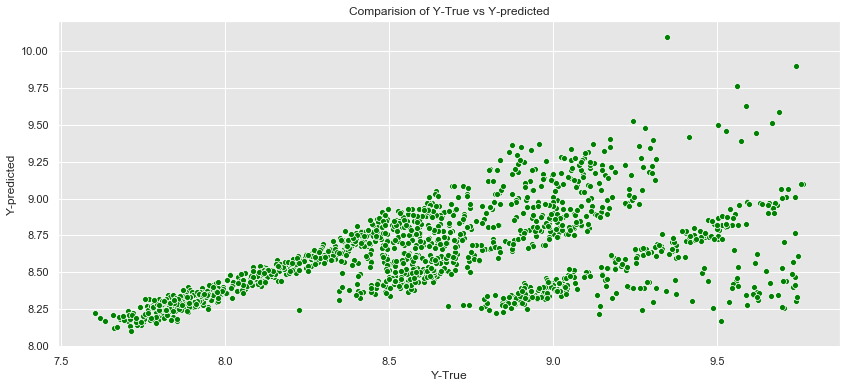

In [33]:
plt.title('Comparision of Y-True vs Y-predicted')
sns.scatterplot(y_test, y_pred_lr_log,color='green')
plt.xlabel('Y-True')
plt.ylabel('Y-predicted')
plt.show()

<p>This Graph shows the performance of Linear Regression Model by comparing the Actual Y values with their log predicted values. The graph shows the irregular straight lines which is not a high performance. The Accuracy of Linear Regression Model is 31% and the error is 69% The Accuracy is too Low and the Error is too high.</p>

# RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=1000)
model = rfc.fit(X_train,y_train)
y_pred_log = model.predict(X_test)
y_pred = [np.exp(x) for x in y_pred_log]

In [35]:
from sklearn.metrics import r2_score
print('The Accuracy Score :',r2_score(y_test,y_pred_log))
print('The Error :',1-r2_score(y_test,y_pred_log))

The Accuracy Score : 0.9643461912771246
The Error : 0.03565380872287538


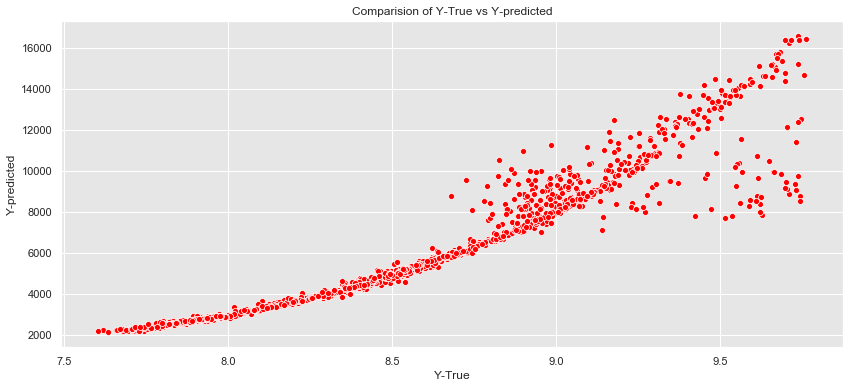

In [36]:
plt.title('Comparision of Y-True vs Y-predicted')
sns.scatterplot(y_test, y_pred,color='red')
plt.xlabel('Y-True')
plt.ylabel('Y-predicted')
plt.show()

<p>This Graph shows the performance of Random Forest Regressor Model by comparing the Actual Y values with their log predicted values. The graph shows the approximately smooth curve with a high Accuracy of 96% and with the error of 0.033% which is too low.</p>

In [37]:
df.columns

Index(['clv', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')